# Documentação TP1 de inteligência artificial

Nome: Caio Teles Cunha

Matrícula: 2020006434

## Introdução

O trabalho teve a intenção de colocar em prática os conhecimentos desenvolvidos em sala de aula sobre métodos de busca. Para isso, foi proposto a resolução de um toy problem, nesse caso o 8-Puzzle, utilizando diferentes algoritmos de busca

## Implementação

### Estruturas de dados

Foi implementada uma classe em python denominada PuzzleNode. A classe foi criada para facilitar e possibilitar a implementação dos algoritmos de busca. Essa classe guarda o estado do jogo, um np.array 3x3 com a posição atual das peças, o nó pai, o movimento que originou esse estado a partir do atual, a altura da árvore em que se encontra o nó, o custo do nó (sem heuristicas o custo do nó é o mesmo da altura da arvore), também guarda o valor da heurística calculada para ele.

Ao longo da implementação do programa foi necessário manter uma lista de nós únicos, para evitar loops e iterações desnecessárias, para isso utilizei a estrutura set() do python.Para que a estrutura funcionasse bem sobre uma lista de elementos da classe PuzzleNode, foi necessário sobrescrever os operadores de igual, menor que e também a função hash. 

## Algoritmos de busca

### Busca em largura (BFS)

A busca em largura expande o nó mais raso ainda não expandido. Ao iniciar, o nó raiz se expande e coloca todos os nós em uma fila (FIFO). A partir dai, o algoritmo expande o primeiro nó da fila, colocando todos os seus filhos no final da fila. O algoritmo continua até encontrar o nó objetivo ou até a fila ficar vazia, caso em que o algoritmo retorna falha.

No caso do 8-puzzle, o algoritmo é completo e ótimo, pois a função de custo é não decrescente da profundidade do nó.

### Busca de custo uniforme

A busca de custo uniforme é bastante semelhante ao BFS, mas expande o nó de menor custo até o momento. Ao iniciar o algoritmo expande o nó raiz e coloca todos os nós em um heap, ordenada pelo custo do nó. A partir dai, o algoritmo expande o primeiro nó da fila, colocando todos os seus filhos no heap. O algoritmo continua até encontrar o nó objetivo ou até a fila ficar vazia, caso em que o algoritmo retorna falha.

O algoritmo é completo (se o custo de cada passo for maior que 0) e ótimo, pois a função de custo é não decrescente da profundidade do nó.

### Busca com aprofundamento iterativo

A busca com aprofundamento iterativo faz repetidas buscas em profundidade aumentando o limite em cada iteração. Ao inciar o algoritmo, ele expande o nó raiz e coloca seus filhos em uma pilha (LIFO) e retira o último nó para processar. Caso o nó não seja o objetivo, o algoritmo expande os filhos do nó e coloca-os na pilha. O algoritmo continua até encontrar o nó objetivo ou até a pilha ficar vazia, caso em que o algoritmo retorna falha. Caso o algoritmo retorne falha, ele aumenta o limite de profundidade em 2 e repete o processo.

O algoritmo de busca com aprofundamento iterativo tenta resolver os problemas comumente encontrados ao usar o algoritmo de busca DFS, que são: ficar preso em loops e não encontrar a resposta ótima. A maior vantagem desse algoritmo em comparação aos anteriores é o seu gasto de memória que é baixo. Ele é completo e ótimo se considerarmos um problema, como é o caso, em que o custo é crescente. 

### Busca gulosa

A busca gulosa expande o nó que parece ser o mais próximo do objetivo. Para isso, utiliza uma heurística (no caso a heurística utilizada é a de número de peças fora da sua posição correta) que estima o custo do caminho do nó até o objetivo. Ao iniciar o algoritmo, ele expande o nó raiz e coloca seus filhos em um heap, ordenado pela heurística. Caso o nó não seja o objetivo, o algoritmo expande os filhos do nó e coloca-os no heap. O algoritmo continua até encontrar o nó objetivo ou até a pilha ficar vazia, caso em que o algoritmo retorna falha.

O algoritmo também se preocupa em substituir um nó já expandido por um nó com um custo menor. O algoritmo não é completo (pode entrar em loop) e não é ótimo.

### Busca A*

A busca A* é a mais eficiente entre os algoritmos apresentados, é completa e ótima (se a heurística é admissível) e expande o menor número de nós em relação às outras. O algoritmo também utiliza um heap, mas o custo do nó a ser expandido é a soma do custo do nó até o momento e a heurística. Ao iniciar o algoritmo, ele expande o nó raiz e coloca seus filhos em um heap, ordenado pelo custo. Caso o nó não seja o objetivo, o algoritmo expande os filhos do nó e coloca-os no heap. O algoritmo continua até encontrar o nó objetivo ou até a pilha ficar vazia, caso em que o algoritmo retorna falha.

## Heurísticas

Conforme a especificação do trabalho os algoritmos de busca A* e greedy deveriam possuir diferentes heuristicas.No caso do A* a heurística é somada com o custo atual do nó, já no caso do greedy o custo do nó é a heurística.

A heurística implementada para o algoritmo greedy consiste em contar a quantidade de peças na posição errada no estado atual do jogo. Uma heurística é admissível se o custo real para o objetivo é menor ou igual ao custo da heurística. Sendo assim essa heurística é admissível, já que cada peça no lugar errado deverá se mexer pelo menos uma vez para arrumar o tabuleiro.

A heurística implementada para o algoritmo A* consiste em calcular a distancia da peça até a sua posição certa (manhattan distance), apenas utilizando movimentos laterais e verticais. A heurística é admissível pois a distancia real da peça até a posição certa é menor ou igual a distancia calculada pela heurística. Essa heurística foi criada resolvendo uma versão relaxada do problema, em que cada peça pode se mover livremente até sua posição certa sem ter que passar apenas pela casa vazia. Logo, o número de movimentos necessários para resolver o problema é menor ou igual ao número de movimentos necessários para resolver a versão relaxada do problema.

## Análise dos resultados

Farei uma breve análise sobre os resultados obtidos com os algoritmos de busca. Para isso, vou utilizar o número de nós expandidos e o tempo de execução como métricas.

### Tempo de execução

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Import your BFS function from the TP1 module
from TP1 import bfs
from TP1 import iterative_deepening
from TP1 import ucs
from TP1 import A_search
from TP1 import greedy_search

def test_execution_time(input_states):
    puzzle_size = 3

    functions = {
        'BFS': bfs,
        'IDS': iterative_deepening,
        'UCS': ucs,
        'A*': A_search,
        'GreedySearch': greedy_search,
    }

    execution_times = {func: [] for func in functions}

    for input_state in input_states:
        for func_name, func in functions.items():
            input_state = np.array(input_state, dtype=int)
            start_time = time.time()
            number_of_expanded_nodes, found = func(input_state)
            end_time = time.time()

            execution_time = end_time - start_time
            execution_times[func_name].append(execution_time)

    function_names = list(execution_times.keys())
    execution_values = [val[0] for val in execution_times.values()]

    plt.bar(function_names, execution_values)
    plt.ylabel('Execution Time (seconds)')
    plt.title(f'Execution Time Comparison ({puzzle_size}x{puzzle_size} Puzzle)')
    plt.grid(True)
    plt.show()

low_number_of_moves = [
    np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]]),
    np.array([[1, 2, 3], [4, 5, 6], [7, 0, 8]]),
]

high_number_of_moves = [
    np.array([[8, 7, 2], [5, 0, 3], [1, 4, 6]]),
]

Para um numero de movimentos para vencer o jogo baixo temos:

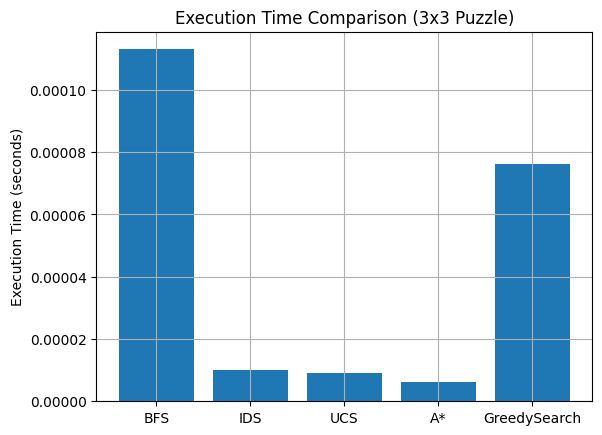

In [6]:
test_execution_time(low_number_of_moves)

Podemos perceber que o algoritmo de busca em largura é o mais lento Para um número de movimentos baixo a diferença de tempo de execução é pequena, mas já é possível perceber que a diferença é significativa.

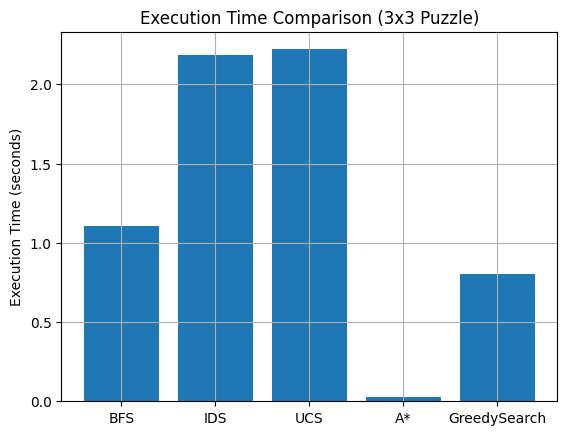

In [7]:
test_execution_time(high_number_of_moves)

Ao executar com uma entrada que necessita um número maior de movimentos para vencer o jogo, fica claro que o algoritmo A* é mais eficiente que os outros, tanto pelo algoritmo quanto pela heurística utilizada.

### Número de nós expandidos

In [26]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Import your BFS function from the TP1 module
from TP1 import bfs
from TP1 import iterative_deepening
from TP1 import ucs
from TP1 import A_search
from TP1 import greedy_search

def test_number_nodes(input_states):
    puzzle_size = 3

    functions = {
        'BFS': bfs,
        'IDS': iterative_deepening,
        'UCS': ucs,
        'A*': A_search,
        'GreedySearch': greedy_search,
    }

    expanded_nodes = {func: [] for func in functions}

    for input_state in input_states:
        for func_name, func in functions.items():
            input_state = np.array(input_state, dtype=int)
            number_of_expanded_nodes, found = func(input_state)
            print(f'{func_name} expanded {number_of_expanded_nodes} nodes')
            expanded_nodes[func_name].append(number_of_expanded_nodes)

    function_names = list(expanded_nodes.keys())
    expanded_nodes_values = [val[0] for val in expanded_nodes.values()]

    plt.bar(function_names, expanded_nodes_values)
    plt.ylabel('Number of nodes expanded')
    plt.title(f'Number of Nodes Expanded Comparison ({puzzle_size}x{puzzle_size} Puzzle)')
    plt.grid(False)
    plt.show()

low_number_of_moves = [
    np.array([[1, 2, 3], [4, 5, 6], [7, 0, 8]]),
]

high_number_of_moves = [
    np.array([[8, 7, 2], [5, 0, 3], [1, 4, 6]]),
]

Para um numero de movimentos para vencer o jogo baixo temos:

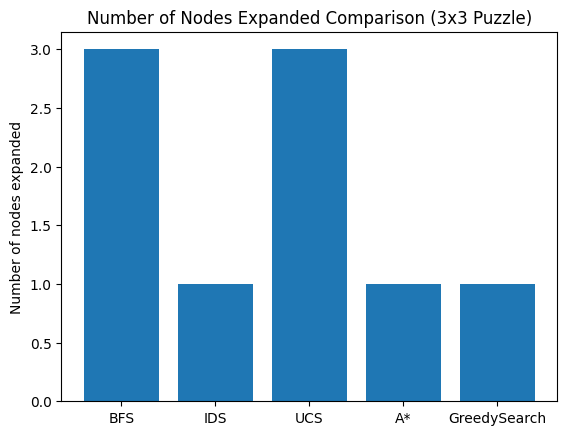

In [24]:
test_number_nodes(low_number_of_moves)

Para um número baixo de movimentos para vencer podemos ver que a diferença entre os algoritmos é pequena, mas já é possível perceber que o algoritmo de busca em largura expande mais nós que o A* por exemplo.

BFS expanded 9138 nodes
IDS expanded 1193861 nodes
UCS expanded 13840 nodes
A* expanded 88 nodes
GreedySearch expanded 606 nodes


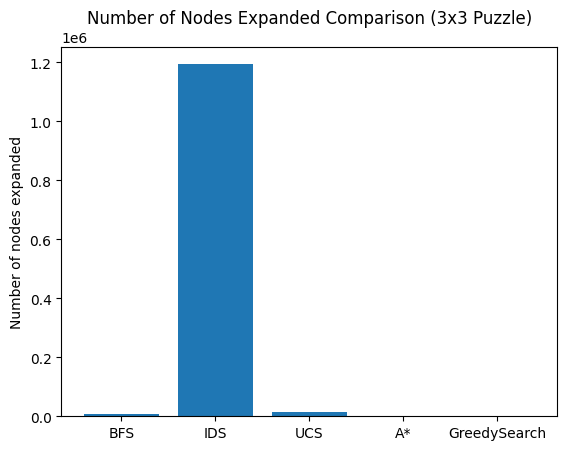

In [27]:
test_number_nodes(high_number_of_moves)

Para um número alto de movimentos a diferença fica muito significativa, sendo o algoritmo A* o mais eficiênte em relação à essa métrica.